In [176]:

# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from matplotlib import rc 

In [177]:
# importing or loading the dataset 
dataset = pd.read_csv('freads.csv') 
print(dataset.columns[0:15])
print(dataset.iloc[0,0])

Index(['name', 'G1', 'G2', 'G3', 'G4', 'ad1', 'ad2', 'ad3', 'ad4',
       'overpotential'],
      dtype='object')
Ni_Salen-spin3


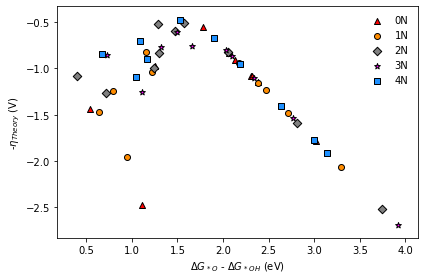

In [178]:
plt.scatter(dataset.iloc[ 0:10,2], dataset.iloc[ 0:10,9],marker='^',edgecolor='k',label="0N",color='r')
plt.scatter(dataset.iloc[10:20,2], dataset.iloc[10:20,9],marker='o',edgecolor='k',label="1N",color='darkorange')
plt.scatter(dataset.iloc[20:30,2], dataset.iloc[20:30,9],marker='D',edgecolor='k',label="2N",color='gray')
plt.scatter(dataset.iloc[30:40,2], dataset.iloc[30:40,9],marker='*',edgecolor='k',label="3N",color='magenta')
plt.scatter(dataset.iloc[40:50,2], dataset.iloc[40:50,9],marker='s',edgecolor='k',label="4N",color='dodgerblue')
plt.xlabel(r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
#plt.ylabel(r"-$\eta$ theory (v)")
#plt.ylabel(r"-$\eta$_theory")
#x=[0,1,2,3,4,5,6,7]
#labels=[0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
plt.ylabel(r'-'+'$\eta$'+"$_{Theory}$"+' (V)')
#plt.xticks(x, labels, rotation='vertical')
#plt.xlim([-0.5,4.5])
#plt.ylim([-3.0,0])#
#plt.gca().set_xticks(np.linspace(-1,5,1))
#plt.gca().set_yticks(np.linspace(-3,0,1))    
##plt.gca().set_xticklabels(['10', '28', "46", "64", '82','100'],fontsize =16,fontweight='bold')
#plt.gca().set_yticklabels(['0', '18', "36", "54", '72','90'],fontsize =16,fontweight='bold')

plt.legend(frameon=False)
#plt.title('ramdom forest training')
plt.tight_layout()
plt.savefig('./oer_Overpotential.jpg',dpi=600)
plt.show()

In [179]:
## importing or loading the dataset 
#dataset = pd.read_csv('oer_f1.csv') 
#print(dataset.columns[0:15])

In [180]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [181]:
X=dataset[['ad1']]
y=dataset[['ad3']]

In [182]:
clf.fit(X,y)
R=clf.score(X,y)
y_pred=clf.predict(X)
print(R)

0.9284309861127148


No handles with labels found to put in legend.


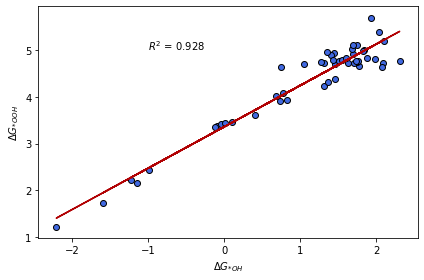

In [184]:
plt.scatter(X, y,marker='o',color='royalblue',edgecolor='k')
plt.plot(X, y_pred,color=(178/256.0,2/256.0,4/256.0),linewidth=1.5)
plt.xlabel(r'Δ'+'$\itG$'+'$_{*OH}$')
#plt.ylabel(r"-$\eta$ theory (v)")

plt.ylabel(r'Δ'+'$\itG$'+'$_{*OOH}$');
plt.legend(frameon=False)
plt.text(-1.0,5.0,r'$R^2$'+' = 0.928')
#plt.title('ramdom forest training')
plt.tight_layout()
plt.savefig('./oer_OH_OOH.jpg',dpi=600)
plt.show()

In [185]:
X=dataset[['ad1']]
y=dataset[['ad2']]

In [186]:
clf.fit(X,y)
R=clf.score(X,y)
y_pred=clf.predict(X)
print(R)

0.5054231815861417


No handles with labels found to put in legend.


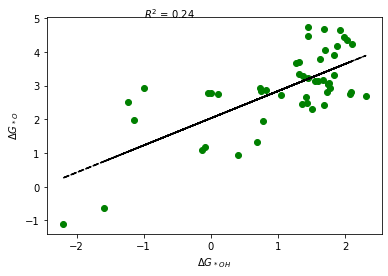

In [187]:
plt.scatter(X, y,marker='o',color='g')
plt.plot(X, y_pred,'--',color='black')
plt.xlabel(r'Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$')
#plt.ylabel(r"-$\eta$ theory (v)")

plt.ylabel(r'Δ'+'$\itG$'+'$_*$'+'$_O$');
plt.legend(frameon=False)
plt.text(-1.0,5.0,r'$R^2$'+' = 0.24')
#plt.title('ramdom forest training')
plt.savefig('./oer_OH_O.jpg',dpi=600)
plt.show()

In [146]:
# importing or loading the dataset 
dataset = pd.read_csv('oer_data.csv') 
print(dataset.columns[0:22])

Index(['2+', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'freeenergy',
       'Unnamed: 10', 'Unnamed: 11', '2+.1', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'adsorption'],
      dtype='object')


In [174]:
sheet_names=['0N','1N','2N','3N','4N']
f=open('freads.txt','a+')
print("name G1 G2 G3 G4 ad1 ad2 ad3 ad4 overpotential",file=f)
for name in sheet_names :
    
    dataset = pd.read_excel('PH0addH.xlsx',sheet_name=name) 
    df=dataset[['2+','step','adsorption','freeenergy']]
    df.dropna(subset=['freeenergy'],axis=0, how='any', inplace=True)#axis：0-行操作（默认），1-列操作 how：any-只要有空值就删除（默认）
    fedata=df
   # print(df)
    for i in range(10):
        #file.write(str(fedata.iloc[0,0]))
        overpotential=max(fedata.iloc[4*i:4*i+4,1])
        print(str(fedata.iloc[4*(i),0]),str(fedata.iloc[4*(i),1]),str(fedata.iloc[4*(i)+1,1])
              ,str(fedata.iloc[4*(i)+2,1]),str(fedata.iloc[4*(i)+3,1]),str(fedata.iloc[4*(i),2]),
              str(fedata.iloc[4*(i)+1,2]),str(fedata.iloc[4*(i)+2,2]),4.92,-(overpotential-1.23),file=f)    
f.close()    
    

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [232]:
# importing or loading the dataset 
dataset = pd.read_csv('oer_G.csv') 
print(dataset.columns[0:15])
dataset.tail()

Index(['name', '0N', '1N', '2N', '3N', '4N'], dtype='object')


,name,0N,1N,2N,3N,4N
35,Zn2+,4.920000,4.920000,4.920000,4.920000,4.920000
36,Mn2+,0.491142,0.613548,0.824770,-0.002209,0.973990
37,Mn2+,-1.625263,2.665681,2.877199,2.783851,2.641772
38,Mn2+,3.695766,3.728028,3.926129,3.256007,4.229451
39,Mn2+,4.920000,4.920000,4.920000,4.920000,4.920000


In [131]:
X1=[0,0.5]
X2=[0.5,1]
X3=[1,1.5]
X4=[1.5,2]
X5=[2,2.5]
X6=[2.5,3]
X7=[3,3.5]
X8=[3.5,4]
X9=[4,4.5]

In [132]:
name=['Ni','Co','Fe','Sc','Ti','Cr','Cu','V','Zn','Mn']

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently r

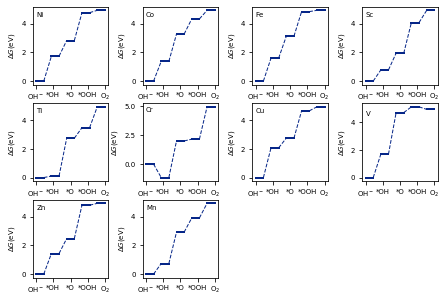

In [142]:
j=5
k=0
for i in range (40,50,1):
    k+=1
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X1, [0,0],color=(6/256.0,38/256.0,137/256.0),linewidth =2.0)
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X2, [0,dataset.iloc[i,j]],'--',color=(6/256.0,38/256.0,137/256.0),linewidth =1.0)
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X3, [dataset.iloc[i,j],dataset.iloc[i,j]],color=(6/256.0,38/256.0,137/256.0),linewidth =2.0)
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X4, [dataset.iloc[i,j],dataset.iloc[i,j+1]],'--',color=(6/256.0,38/256.0,137/256.0),linewidth =1.0) 
    ax2 = plt.subplot(3,4,k)   
    ax2.plot(X5, [dataset.iloc[i,j+1],dataset.iloc[i,j+1]],color=(6/256.0,38/256.0,137/256.0),linewidth =2.0)
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X6, [dataset.iloc[i,j+1],dataset.iloc[i,j+2]],'--',color=(6/256.0,38/256.0,137/256.0),linewidth =1.0)
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X7, [dataset.iloc[i,j+2],dataset.iloc[i,j+2]],color=(6/256.0,38/256.0,137/256.0),linewidth =2.0)
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X8, [dataset.iloc[i,j+2],dataset.iloc[i,j+3]],'--',color=(6/256.0,38/256.0,137/256.0),linewidth =1.0) 
    ax2 = plt.subplot(3,4,k)
    ax2.plot(X9, [dataset.iloc[i,j+3],dataset.iloc[i,j+3]],color=(6/256.0,38/256.0,137/256.0),linewidth =2.0) 
    #plt.xlabel(r'Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$')
    #plt.ylabel(r"-$\eta$ theory (v)")
    plt.gca().set_xticks(np.linspace(0,4.5,5))
    plt.yticks( size = 7)
    #ax.set_xticklabels( ('275', '280', '285', '290', '295',  '300',  '305',  '310', '315'))
    plt.gca().set_xticklabels([r"OH$^-$", "*OH", "*O", "*OOH", r"O$_2$" ],fontdict={ 'size'   : 7})
    plt.ylabel(r'Δ'+'$\itG$'+'(eV)',fontdict={ 'size'   : 7});
    #plt.legend(frameon=False)
    plt.tight_layout(pad=0.0, w_pad=0.05, h_pad=0.15)
    #filename=str(name[j-10])+".jpg"
    plt.text(0.0,4.5,dataset['name'][i],fontdict={ 'size'   : 7})
    #plt.title('ramdom forest training')
    
plt.savefig('./4N.jpg',dpi=600)

plt.show()

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous 

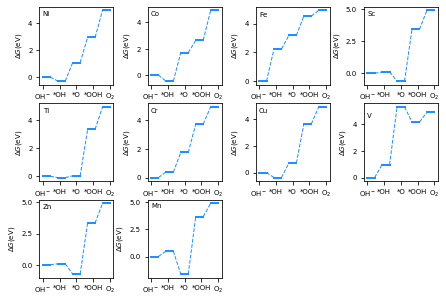

In [239]:
y=dataset[['0N']]

for i in range (0,37,4):
    j=int(i/4)

    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X1, [0,0],color='dodgerblue',linewidth =2.0)
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X2, [0,y.iloc[i]],'--',color='dodgerblue',linewidth =1.0)
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X3, [y.iloc[i],y.iloc[i]],color='dodgerblue',linewidth =2.0)
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X4, [y.iloc[i],y.iloc[i+1]],'--',color='dodgerblue',linewidth =1.0) 
    ax2 = plt.subplot(3,4,j+1)   
    ax2.plot(X5, [y.iloc[i+1],y.iloc[i+1]],color='dodgerblue',linewidth =2.0)
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X6, [y.iloc[i+1],y.iloc[i+2]],'--',color='dodgerblue',linewidth =1.0)
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X7, [y.iloc[i+2],y.iloc[i+2]],color='dodgerblue',linewidth =2.0)
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X8, [y.iloc[i+2],y.iloc[i+3]],'--',color='dodgerblue',linewidth =1.0) 
    ax2 = plt.subplot(3,4,j+1)
    ax2.plot(X9, [y.iloc[i+3],y.iloc[i+3]],color='dodgerblue',linewidth =2.0) 
    #plt.xlabel(r'Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$')
    #plt.ylabel(r"-$\eta$ theory (v)")
    plt.gca().set_xticks(np.linspace(0,4.5,5))
    plt.yticks( size = 7)
    #ax.set_xticklabels( ('275', '280', '285', '290', '295',  '300',  '305',  '310', '315'))
    plt.gca().set_xticklabels([r"OH$^-$", "*OH", "*O", "*OOH", r"O$_2$" ],fontdict={ 'size'   : 7})
    plt.ylabel(r'Δ'+'$\itG$'+'(eV)',fontdict={ 'size'   : 7});
    #plt.legend(frameon=False)
    plt.tight_layout(pad=0.0, w_pad=0.05, h_pad=0.15)
    filename=str(name[j])+".jpg"
    plt.text(0.0,4.5,name[j],fontdict={ 'size'   : 7})
    #plt.title('ramdom forest training')
    
plt.savefig('./0N.jpg',dpi=600)

plt.show()

In [227]:
# importing or loading the dataset 
dataset = pd.read_csv('hbond.csv') 
print(dataset.columns[0:16])


Index(['step1', 'Number1', 'step2', 'Number2', 'step3', 'Number3', 'step4',
       'Number4', 'step5', 'Number5', 'step6', 'Number6', 'step7', 'Number7',
       'step8', 'Number8'],
      dtype='object')


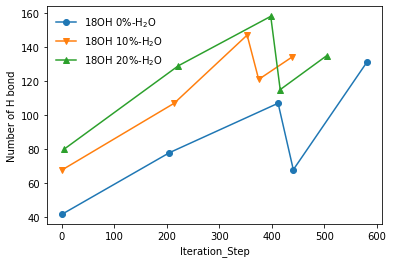

In [231]:
plt.plot(dataset[['step2']], dataset[['Number2']],'o-',label=r"18OH 0%-H$_2$O")
plt.plot(dataset[['step7']], dataset[['Number7']],'v-',label=r"18OH 10%-H$_2$O")
plt.plot(dataset[['step8']], dataset[['Number8']],'^-',label=r"18OH 20%-H$_2$O")
#plt.plot(dataset[['step4']], dataset[['Number4']],'s-',label="18O")
#plt.plot(dataset[['step1']], dataset[['Number1']],marker='*',label="4N")
plt.xlabel('Iteration_Step')
#plt.ylabel(r"-$\eta$ theory (v)")
plt.ylabel("Number of H bond")

plt.legend(frameon=False)
#plt.title('ramdom forest training')
plt.savefig('./Hbond-2.jpg',dpi=600)
plt.show()

In [4]:
# importing or loading the dataset 
data_covid = pd.read_csv('data_covid.csv') 
data_heal = pd.read_csv('data_heal.csv') 
print(data_covid.columns[0:7])


Index(['Height', 'Weight', 'Age', 'BMI', 'Body Area', 'Gender', 'FeNO'], dtype='object')


D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

FeNO ppb [15.527472527472527, 5.009636623195248]


D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

Height cm [166.46153846153845, 6.718643534238955]


D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

Weight Kg [63.9923076923077, 11.64931310105861]
Age year [37.35164835164835, 12.655586053749479]


D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

BMI  [23.01114645450551, 3.463359772723714]


D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

Body Area m$^2$ [1.6816169230769222, 0.17617373021280447]


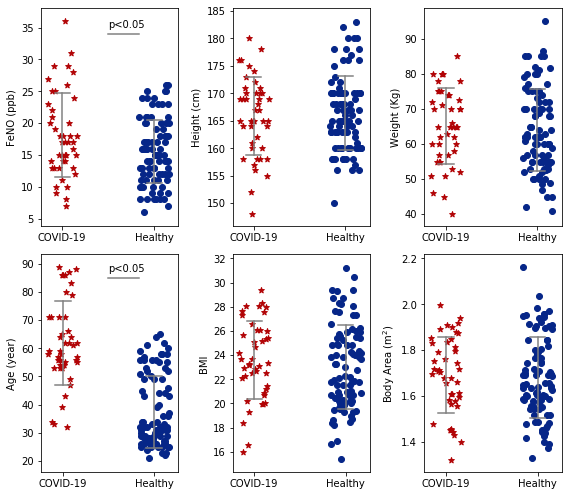

In [6]:
fig = plt.figure(figsize=(8, 7))
j=0

unit=["ppb",'cm','Kg','year','',r'm$^2$']
for feature in [ 'FeNO','Height', 'Weight', 'Age', 'BMI', 'Body Area' ]:
    xheight=[data_covid[feature].mean(),data_covid[feature].std()]
    Num1=data_covid[feature].shape[0]
    

    rarray=np.random.random(size=Num1)


    xheight1=[data_heal[feature].mean(),data_heal[feature].std()]
    

    
    Num2=data_heal[feature].shape[0]
    #print(Num2)

    rarray1=np.random.random(size=Num2)+3
    
    for i in range(Num1):
        ax2 = plt.subplot(2,3,j+1)
        plt.scatter(rarray[i],data_covid[feature].iloc[i],color=(178/256.0,2/256.0,4/256.0),marker="*")
    ax2 = plt.subplot(2,3,j+1)
    plt.plot([0.25,0.75],[xheight[0]-xheight[1],xheight[0]-xheight[1]],color='gray')
    ax2 = plt.subplot(2,3,j+1)
    plt.plot([0.25,0.75],[xheight[0]+xheight[1],xheight[0]+xheight[1]],color='gray')
    ax2 = plt.subplot(2,3,j+1)
    plt.plot([0.5,0.5],[xheight[0]-xheight[1],xheight[0]+xheight[1]],color='gray')

    for i in range(Num2):
        ax2 = plt.subplot(2,3,j+1)
        plt.scatter(rarray1[i],data_heal[feature].iloc[i],color=(6/256.0,38/256.0,137/256.0))
    ax2 = plt.subplot(2,3,j+1)
    plt.plot([3.25,3.75],[xheight1[0]-xheight1[1],xheight1[0]-xheight1[1]],color='gray')
    ax2 = plt.subplot(2,3,j+1)
    plt.plot([3.25,3.75],[xheight1[0]+xheight1[1],xheight1[0]+xheight1[1]],color='gray')
    ax2 = plt.subplot(2,3,j+1)
    plt.plot([3.5,3.5],[xheight1[0]-xheight1[1],xheight1[0]+xheight1[1]],color='gray')
    
    if (feature == 'Age'):
        plt.plot([2,3],[data_covid[feature].max()-4,data_covid[feature].max()-4],color='gray')
        plt.text(2,data_covid[feature].max()-2,'p<0.05')
    elif(feature=='FeNO'):
        plt.plot([2,3],[data_covid[feature].max()-2,data_covid[feature].max()-2],color='gray')
        plt.text(2,data_covid[feature].max()-1,'p<0.05')
        

    if (feature != 'BMI'):
        plt.ylabel(feature+" ("+unit[j]+")")
    else:
        plt.ylabel(feature)
    
    plt.gca().set_xticks(np.linspace(0.5,3.5,2))
    #plt.yticks( size = 7)
    #ax.set_xticklabels( ('275', '280', '285', '290', '295',  '300',  '305',  '310', '315'))
    plt.gca().set_xticklabels(['COVID-19', "Healthy" ])       
    
    print(feature,unit[j],xheight1)   
        
    #plt.xlabel(feature)
    #plt.gca().set_xticklabels([])
    #plt.xlim(-1, 8)
    #plt.ylim(145, 200)
    j+=1


#plt.xlabel(r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$')
    #plt.ylabel(r"-$\eta$ theory (v)")
#plt.ylabel(r"-$\eta$_theory")
#plt.ylabel(r'-'+'$\eta$'+"$_T$"+"$_h$"+"$_e$"+"$_o$"+"$_r$"+"$_y$"+' (V)');
#plt.legend(frameon=False)
plt.tight_layout()
#plt.title('ramdom forest training')
plt.savefig('./sta_fea.jpg',dpi=600)
plt.show()


In [22]:
data_covid = pd.read_csv('data_heal.csv')

In [23]:

j=0

unit=['cm','Kg','year','',r'm$^2$',"ppb",'']
for feature in ['Height', 'Weight', 'Age', 'BMI', 'Body Area',  'FeNO','Gender']:
    if feature=="Gender":
        xheight=data_covid[feature].value_counts()
        rate1=xheight.iloc[0]/(xheight.iloc[0]+xheight.iloc[1])*100.0
        rate2=100.0-rate1
        #print(xheight.index[1])
        #gender=list(xheight)
        print("gender is  %s count %i (%.2f)"%(xheight.index[0],xheight.iloc[0],rate1)) 
        print("gender is  %s count %i (%.2f)"%(xheight.index[1],xheight.iloc[1],rate2))
        
    else:   
        xheight=[data_covid[feature].mean(),data_covid[feature].std()]
        xmax=data_covid[feature].max()
        xmin=data_covid[feature].min()
        print ("%s is %s and %.2f ± %.2f range %.1f-%.1f"%(feature,unit[j],xheight[0],xheight[1],xmin,xmax) )  

        
    
    
    
    #plt.xlabel(feature)
    #plt.gca().set_xticklabels([])
    #plt.xlim(-1, 8)
    #plt.ylim(145, 200)
    j+=1



Height is cm and 166.66 ± 6.82 range 150.0-183.0
Weight is Kg and 64.24 ± 11.71 range 41.0-95.0
Age is year and 37.53 ± 12.61 range 21.0-65.0
BMI is  and 23.04 ± 3.44 range 15.4-31.2
Body Area is m$^2$ and 1.69 ± 0.18 range 1.3-2.2
FeNO is ppb and 15.66 ± 5.07 range 6.0-26.0
gender is  1 count 55 (59.14)
gender is  2 count 38 (40.86)


In [143]:
data_covid = pd.read_excel('xinxueguan.xlsx')

In [145]:

j=0

unit=['cm','Kg','year','',r'm$^2$',"ppb",'']
for feature in ['Height', 'Weight', 'Age', 'BMI', 'Body Area',  'FeNO','Gender']:
    if feature=="Gender":
        xheight=data_covid[feature].value_counts()
       # rate1=xheight.iloc[0]/(xheight.iloc[0]+xheight.iloc[1])*100.0
        #rate2=100.0-rate1
        #print(xheight.index[1])
        #gender=list(xheight)
       # print("gender is  %s count %i (%.2f)"%(xheight.index[0],xheight.iloc[0],rate1)) 
       # print("gender is  %s count %i (%.2f)"%(xheight.index[1],xheight.iloc[1],rate2))
        
    else:   
        xheight=[data_covid[feature].mean(),data_covid[feature].std()]
        xmax=data_covid[feature].max()
        xmin=data_covid[feature].min()
        print ("%s is %s and %.2f ± %.2f range %.1f-%.1f"%(feature,unit[j],xheight[0],xheight[1],xmin,xmax) )  

        
    
    
    
    #plt.xlabel(feature)
    #plt.gca().set_xticklabels([])
    #plt.xlim(-1, 8)
    #plt.ylim(145, 200)
    j+=1



Height is cm and 163.33 ± 5.77 range 160.0-170.0
Weight is Kg and 65.00 ± 13.23 range 55.0-80.0
Age is year and 49.00 ± 2.00 range 47.0-51.0
BMI is  and 24.20 ± 3.17 range 21.5-27.7
Body Area is m$^2$ and 1.68 ± 0.20 range 1.5-1.9
FeNO is ppb and 35.67 ± 5.69 range 31.0-42.0
